In [1]:
import tensorflow as tf

2022-12-21 14:47:04.883474: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 14:47:05.565528: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64
2022-12-21 14:47:05.565566: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64
2022-12-21 14:47:05.565570: W tensorflow/compiler/tf2tensorrt/utils/py_utils

## Implementing MLP with Keras

### Building an Image Classifier Using the Sequential API

##### Using Keras to load the dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_full_train, y_full_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_full_train.shape

(60000, 28, 28)

In [4]:
# get validation set and scale pixel intensities
X_valid,  X_train = X_full_train[:5000] / 255.0, X_full_train[5000:] / 255.0
y_valid, y_train = y_full_train[:5000], y_full_train[5000:]

In [5]:
X_valid.shape, y_valid.shape

((5000, 28, 28), (5000,))

In [6]:
X_train.shape, y_train.shape

((55000, 28, 28), (55000,))

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

In [8]:
class_names[y_train[0]]

'Coat'

##### Creating the model using the Sequential API

In [9]:
from tensorflow import keras

> First implementing.

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(len(class_names), activation="softmax"))

2022-12-21 14:47:07.314108: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 14:47:07.319055: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 14:47:07.319534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 14:47:07.320581: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

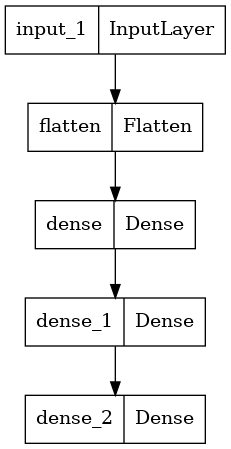

In [11]:
tf.keras.utils.plot_model(model)

> Second implementing.

In [12]:
model1 = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=[28,28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(len(class_names), activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


> Use tf.keras.utils.plot_model(model) to visualize model.

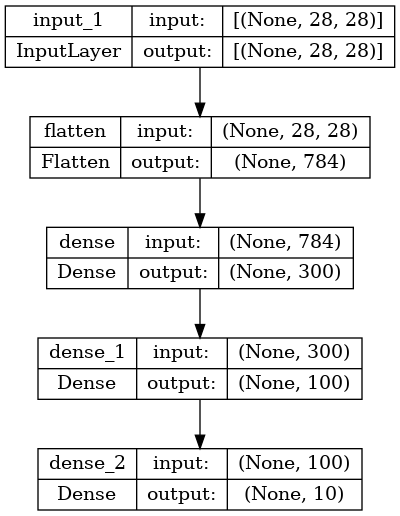

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

> All parameters of a layer can be accessed using `get_weights()` and `set_weights()` methods.

In [17]:
weights1, biases1 = hidden1.get_weights()
weights1

array([[ 0.0253729 , -0.03410583,  0.0255294 , ...,  0.03759057,
         0.00800456, -0.07244537],
       [ 0.04069862,  0.00763364,  0.06987834, ..., -0.06722478,
        -0.03834945,  0.0697104 ],
       [ 0.01139136, -0.07390811, -0.05737321, ...,  0.07429823,
         0.03040782, -0.03388625],
       ...,
       [ 0.07337984, -0.01022552,  0.05505382, ..., -0.0087951 ,
        -0.06122714,  0.0420931 ],
       [ 0.03246667,  0.0280218 ,  0.02974636, ..., -0.06451692,
         0.02766231, -0.06597077],
       [ 0.05236879,  0.0360298 , -0.06470092, ...,  0.04173302,
         0.06756043, -0.0556257 ]], dtype=float32)

In [18]:
biases1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

##### Compile the model

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

##### Training and Evaluating model

In [20]:
history = model.fit(X_train, y_train, epochs=30,
            validation_data=(X_valid, y_valid))

Epoch 1/30


2022-12-21 14:47:09.528179: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-12-21 14:47:09.529738: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7ef7a9078700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-21 14:47:09.529751: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2022-12-21 14:47:09.574425: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 3s 1ms/step - loss: 0.7236 - accuracy: 0.7653 - val_loss: 0.4990 - val_accuracy: 0.8328
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4886 - accuracy: 0.8297 - val_loss: 0.4756 - val_accuracy: 0.8388
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4428 - accuracy: 0.8443 - val_loss: 0.4129 - val_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4154 - accuracy: 0.8545 - val_loss: 0.3999 - val_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3948 - accuracy: 0.8621 - val_loss: 0.4006 - val_accuracy: 0.8598
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3799 - accuracy: 0.8665 - val_loss: 0.3784 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3661 - accuracy: 0.8701 - val_loss: 0.3644 - val_accuracy: 0.8746
Epo

> Visualize model.

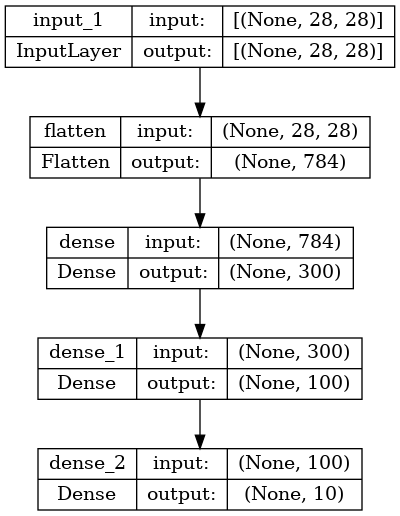

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

> Visulize training process.

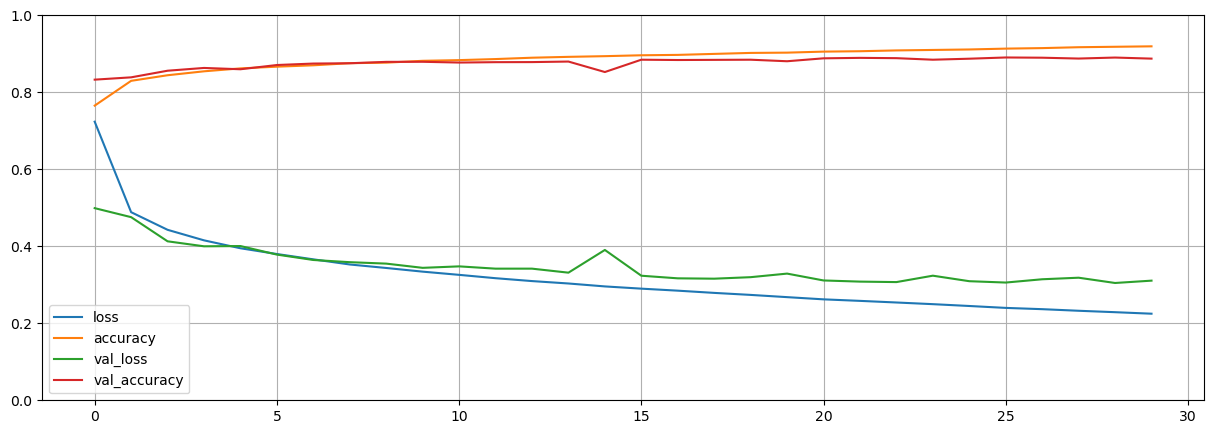

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(15,5))
plt.grid(True)
plt.gca().set_ylim(0,1)     # set the vertical range to [0-1]
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 848us/step - loss: 68.4397 - accuracy: 0.8455


[68.43971252441406, 0.8454999923706055]

##### Using the model to make predictions

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 53ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
classes_x=tf.argmax(y_proba,axis=1)
classes_x.numpy()

array([9, 2, 1])

In [26]:
import numpy as np
np.array(class_names)[classes_x.numpy()]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Building a Regression MLP Using the Sequential API

In [27]:
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [29]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_valid = scale.transform(X_valid)
X_test = scale.transform(X_test)

In [30]:
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_reg.compile(loss="mean_squared_error", optimizer="sgd")

In [31]:
model_reg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 20)                620       
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


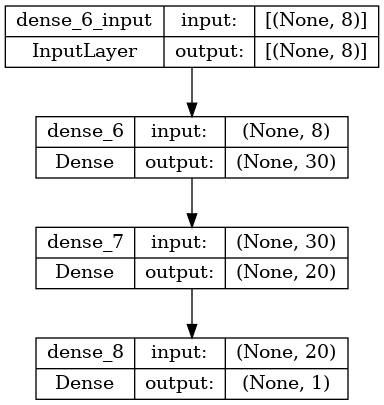

In [32]:
tf.keras.utils.plot_model(model_reg, show_shapes=True)

In [33]:
history = model_reg.fit(X_train, y_train, epochs=20,
            validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8310 - val_loss: 0.7033
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8711 - val_loss: 1.4535
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1.8584 - val_loss: 0.5206
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4758 - val_loss: 0.4568
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4385 - val_loss: 0.4391
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4186 - val_loss: 0.4200
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4028 - val_loss: 0.4059
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3908 - val_loss: 0.3960
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3806 - val_loss: 0.3852
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3750 - val_loss: 0.3805

In [34]:
mse_test = model_reg.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 696us/step - loss: 0.3270


0.3269813656806946

In [35]:
X_new = X_test[:3]
y_pred = model_reg.predict(X_new)
y_pred

1/1 [==============================] - 0s 33ms/step


array([[3.6017942],
       [2.076732 ],
       [2.2532876]], dtype=float32)

In [36]:
y_new = y_test[:3]
y_new

array([3.5  , 1.449, 1.593])

### Building Complex Models Using the Functional API

> [Deep - Wide neural network](https://ai.googleblog.com/2016/06/wide-deep-learning-better-together-with.html). <br>
> Deep - Wide neural network connects all or part of inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using deep path) and simple rules (through the short path).

In [37]:
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_)
hidden2 = tf.keras.layers.Dense(20, activation="relu")(hidden1)
concat = tf.keras.layers.Concatenate()([input_, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model_reg1 = tf.keras.Model(inputs=[input_], outputs=[output])

In [38]:
model_reg1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 30)           270         ['input_3[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 20)           620         ['dense_9[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 28)           0           ['input_3[0][0]',                
                                                                  'dense_10[0][0]']           

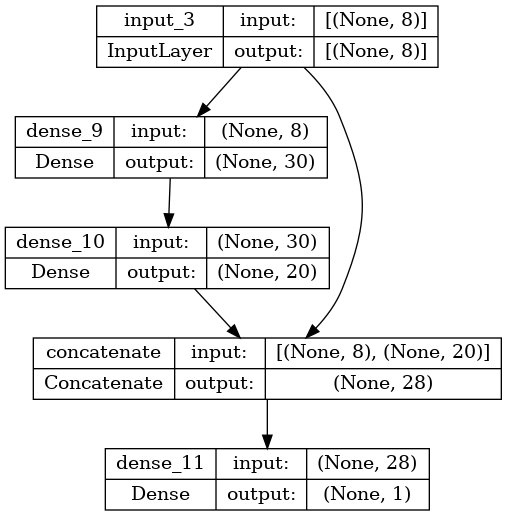

In [39]:
tf.keras.utils.plot_model(model_reg1, show_shapes=True)

> Handling multiple input.

> Use subset of features through the widde path and a different subset through the deep path.

In [40]:
input_A = tf.keras.layers.Input(shape=[5], name="wide_input")
input_B = tf.keras.layers.Input(shape=[6], name="deep_input")
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.Concatenate()([input_A, hidden2])
output = tf.keras.layers.Dense(1, name="output")(concat)
model_reg2 = tf.keras.Model(inputs=[input_A, input_B], outputs=[output])

In [41]:
model_reg2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 30)           930         ['dense_12[0][0]']               
                                                                                            

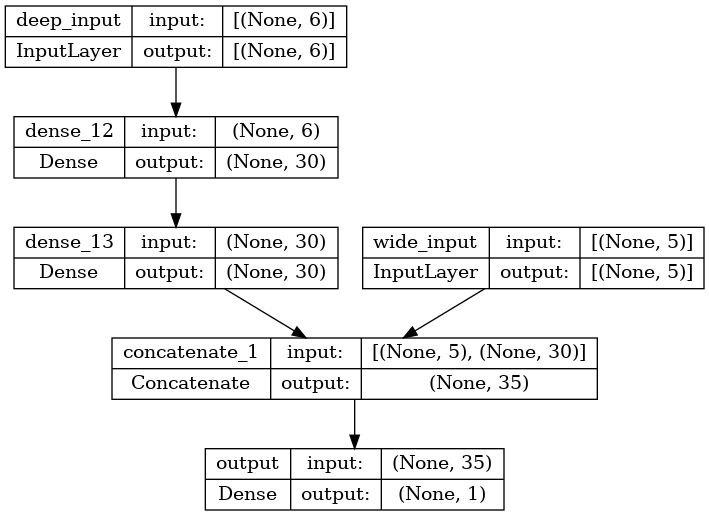

In [42]:
tf.keras.utils.plot_model(model_reg2, show_shapes=True)

In [43]:
model_reg2.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model_reg2.fit((X_train_A, X_train_B), y_train, epochs=20,
            validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model_reg2.evaluate((X_test_A, X_test_B), y_test)
mse_test

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9171 - val_loss: 1.3663
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 1.3586 - val_loss: 0.5615
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4750 - val_loss: 0.4699
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4349 - val_loss: 0.4452
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4205 - val_loss: 0.4265
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4163 - val_loss: 0.4202
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4032 - val_loss: 0.4098
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3942 - val_loss: 0.4121
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3875 - val_loss: 0.3999
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3837 - val_loss: 0.4029

0.32798048853874207

In [44]:
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
y_pred = model_reg2.predict((X_new_A, X_new_B))
y_pred

1/1 [==============================] - 0s 39ms/step


array([[2.9758961],
       [2.0688796],
       [1.9315546]], dtype=float32)

In [45]:
y_test[:3]

array([3.5  , 1.449, 1.593])

> Multiple outputs.

In [46]:
input_A = tf.keras.layers.Input(shape=[5], name="wide_input")
input_B = tf.keras.layers.Input(shape=[6], name="deep_input")
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.Concatenate()([input_A, hidden2])
output = tf.keras.layers.Dense(1, name="output")(concat)
aux_output = tf.keras.layers.Dense(1, name="aux_output")(hidden2)
model_multiInput_multiOutput = tf.keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [47]:
model_multiInput_multiOutput.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 30)           930         ['dense_14[0][0]']               
                                                                                            

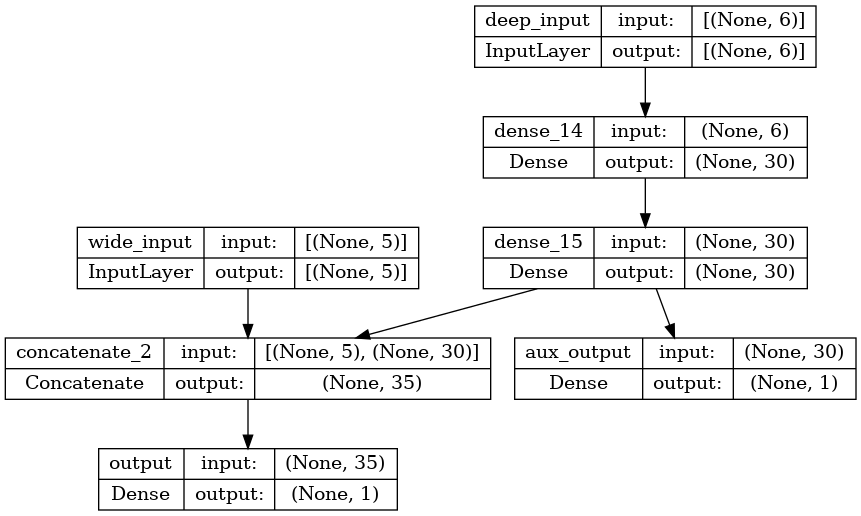

In [48]:
tf.keras.utils.plot_model(model_multiInput_multiOutput, show_shapes=True)

> Each output will need its own loss function. Therefore, when we compile the model,
we should pass a list of losses 20 (if we pass a single loss, Keras will assume that the
same loss must be used for all outputs). By default, Keras will compute all these losses
and simply add them up to get the final loss used for training. We care much more
about the main output than about the auxiliary output (as it is just used for regulari‐
zation), so we want to give the main output’s loss a much greater weight. Fortunately,
it is possible to set all the loss weights when compiling the model:

In [49]:
model_multiInput_multiOutput.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [50]:
history = model_multiInput_multiOutput.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
            validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9083 - output_loss: 0.7674 - aux_output_loss: 2.1762 - val_loss: 0.6484 - val_output_loss: 0.5646 - val_aux_output_loss: 1.4030
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6317 - output_loss: 0.5652 - aux_output_loss: 1.2302 - val_loss: 0.5577 - val_output_loss: 0.4932 - val_aux_output_loss: 1.1383
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5415 - output_loss: 0.4890 - aux_output_loss: 1.0136 - val_loss: 0.5411 - val_output_loss: 0.4929 - val_aux_output_loss: 0.9754
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4948 - output_loss: 0.4524 - aux_output_loss: 0.8768 - val_loss: 0.5017 - val_output_loss: 0.4609 - val_aux_output_loss: 0.8689
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4760 - output_loss: 0.4405 - aux_output_loss: 0.7952 - val_loss: 0.4869 - val_output_loss: 0.4527 - val_aux_

In [51]:
total_loss, main_loss, aux_loss = model_multiInput_multiOutput.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 963us/step - loss: 0.3597 - output_loss: 0.3447 - aux_output_loss: 0.4942


(0.3596901297569275, 0.3447464108467102, 0.494183212518692)

In [52]:
y_pred_main, y_pred_aux = model_multiInput_multiOutput.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 41ms/step


In [53]:
y_pred_main, y_pred_aux

(array([[2.795551 ],
        [2.0381882],
        [2.0335286]], dtype=float32),
 array([[2.4257128],
        [2.5133524],
        [1.9168684]], dtype=float32))

### Using the Subclassing API to Build Dynamic Models

In [54]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.Concatenate()([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [55]:
model = WideAndDeepModel()

In [56]:
model.build(input_shape=[(None, 5), (None, 6)])

In [57]:
model.summary()

Model: "wide_and_deep_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            multiple                  210       
                                                                 
 dense_17 (Dense)            multiple                  930       
                                                                 
 dense_18 (Dense)            multiple                  36        
                                                                 
 dense_19 (Dense)            multiple                  31        
                                                                 
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


### Saving and Restoring a Model

In [58]:
model_multiInput_multiOutput.save("my_keras_model.h5")

In [59]:
# load model
model = tf.keras.models.load_model("my_keras_model.h5")
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 30)           930         ['dense_14[0][0]']               
                                                                                            

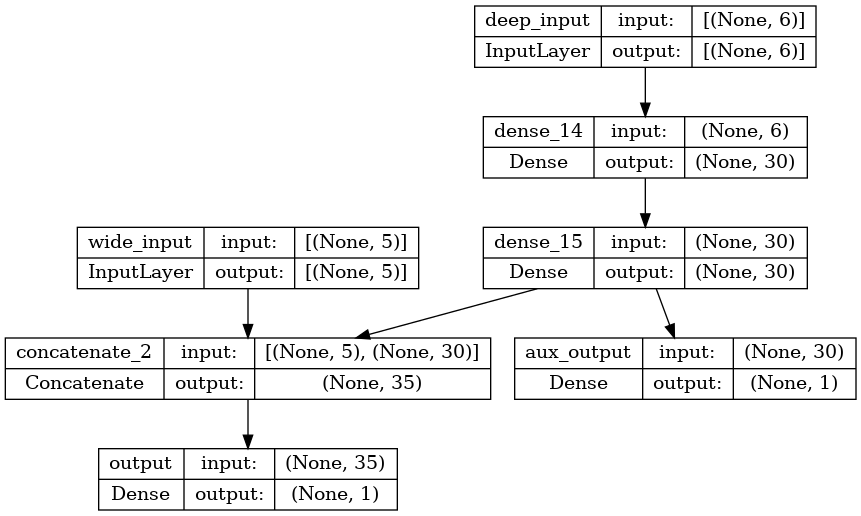

In [60]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Using Callbacks

> The fit() method accepts a callbacks argument that lets you specify a list of objects
that Keras will call at the start and end of training, at the start and end of each epoch,
and even before and after processing each batch.

In [61]:
check_point = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10,
            validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
            callbacks=[check_point])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3643 - output_loss: 0.3517 - aux_output_loss: 0.4771 - val_loss: 0.3803 - val_output_loss: 0.3678 - val_aux_output_loss: 0.4925
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3630 - output_loss: 0.3509 - aux_output_loss: 0.4716 - val_loss: 0.3869 - val_output_loss: 0.3762 - val_aux_output_loss: 0.4830
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3609 - output_loss: 0.3492 - aux_output_loss: 0.4657 - val_loss: 0.3810 - val_output_loss: 0.3695 - val_aux_output_loss: 0.4850
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3586 - output_loss: 0.3470 - aux_output_loss: 0.4627 - val_loss: 0.3782 - val_output_loss: 0.3672 - val_aux_output_loss: 0.4776
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3543 - output_loss: 0.3432 - aux_output_loss: 0.4548 - val_loss: 0.3709 - val_output_loss: 0.3596 - val_aux_

> Moreover, if you use a validation set during training, you can set
save_best_only=True when creating the ModelCheckpoint . In this case, it will only
save your model when its performance on the validation set is the best so far.

In [62]:
check_point = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10,
            validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
            callbacks=[check_point])

model_load = tf.keras.models.load_model("my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3506 - output_loss: 0.3407 - aux_output_loss: 0.4393 - val_loss: 0.3637 - val_output_loss: 0.3536 - val_aux_output_loss: 0.4552
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3476 - output_loss: 0.3378 - aux_output_loss: 0.4364 - val_loss: 0.3642 - val_output_loss: 0.3549 - val_aux_output_loss: 0.4483
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3468 - output_loss: 0.3371 - aux_output_loss: 0.4343 - val_loss: 0.3617 - val_output_loss: 0.3527 - val_aux_output_loss: 0.4426
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3461 - output_loss: 0.3367 - aux_output_loss: 0.4310 - val_loss: 0.3589 - val_output_loss: 0.3494 - val_aux_output_loss: 0.4445
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3435 - output_loss: 0.3340 - aux_output_loss: 0.4289 - val_loss: 0.3584 - val_output_loss: 0.3488 - val_aux_

> Early stopping.

> It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll
back to the best model. You can combine both callbacks to save checkpoints of your
model (in case your computer crashes) and interrupt training early when there is no
more progress (to avoid wasting time and resources):

In [63]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=100,
            validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
            callbacks=[early_stopping, check_point])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3409 - output_loss: 0.3322 - aux_output_loss: 0.4195 - val_loss: 0.3744 - val_output_loss: 0.3658 - val_aux_output_loss: 0.4526
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3392 - output_loss: 0.3304 - aux_output_loss: 0.4183 - val_loss: 0.3550 - val_output_loss: 0.3464 - val_aux_output_loss: 0.4327
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3419 - output_loss: 0.3334 - aux_output_loss: 0.4181 - val_loss: 0.3624 - val_output_loss: 0.3543 - val_aux_output_loss: 0.4354
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3379 - output_loss: 0.3294 - aux_output_loss: 0.4140 - val_loss: 0.3559 - val_output_loss: 0.3477 - val_aux_output_loss: 0.4297
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3372 - output_loss: 0.3286 - aux_output_loss: 0.4150 - val_loss: 0.3532 - val_output_loss: 0.3448 - val

> If you need extra control, you can easily write your own custom callbacks. As an
example of how to do that, the following custom callback will display the ratio
between the validation loss and the training loss during training (e.g., to detect over‐
fitting):

In [64]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

> As you might expect, you can implement on_train_begin() , on_train_end() ,
on_epoch_begin() , on_epoch_end() , on_batch_begin() , and on_batch_end() . Call‐
backs can also be used during evaluation and predictions, should you ever need them
(e.g., for debugging). For evaluation, you should implement on_test_begin() ,
on_test_end() , on_test_batch_begin() , or on_test_batch_end() (called by evalu
ate() ), and for prediction you should implement on_predict_begin() , on_pre
dict_end() , on_predict_batch_begin() , or on_predict_batch_end() (called by
predict() ).

### Using TensorBoard for Visualization

In [65]:
import os
root_log_dir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_log_dir, run_id)

run_logdir = get_run_logdir()

In [66]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=30,
            validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
            callbacks=[tensorboard_cb])      

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3223 - output_loss: 0.3155 - aux_output_loss: 0.3840 - val_loss: 0.3376 - val_output_loss: 0.3301 - val_aux_output_loss: 0.4051
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3223 - output_loss: 0.3155 - aux_output_loss: 0.3835 - val_loss: 0.3338 - val_output_loss: 0.3267 - val_aux_output_loss: 0.3976
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3212 - output_loss: 0.3143 - aux_output_loss: 0.3829 - val_loss: 0.3371 - val_output_loss: 0.3301 - val_aux_output_loss: 0.4001
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3245 - output_loss: 0.3179 - aux_output_loss: 0.3842 - val_loss: 0.3375 - val_output_loss: 0.3305 - val_aux_output_loss: 0.4003
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3198 - output_loss: 0.3129 - aux_output_loss: 0.3820 - val_loss: 0.3506 - val_output_loss: 0.3437 - val_aux_

## Fine-Tuning Neural Network Hyperparameters

In [67]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1))
    optimizer = tf.keras.optimizers.SGD(learning_rate==learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [69]:
X_train.shape, y_train.shape

((11610, 8), (11610,))

In [70]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/tmp/ipykernel_25542/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [71]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
    }
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])

242/242 [==============================] - 0s 1ms/step - loss: 0.3322 - val_loss: 0.3641
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3348 - val_loss: 0.3606
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3302 - val_loss: 0.3637
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3319 - val_loss: 0.3520
Epoch 51/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3290 - val_loss: 0.3537
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3289 - val_loss: 0.3593
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3348 - val_loss: 0.3495
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3285 - val_loss: 0.3544
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3262 - val_loss: 0.3555
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3276 - val_loss: 

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.5904 - val_loss: 8.5471
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 23.4027 - val_loss: 283.9859
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 732.3195 - val_loss: 10168.9131
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 24589.5605 - val_loss: 371326.4375
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 883756.3125 - val_loss: 13276150.0000
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 30899002.0000 - val_loss: 654110016.0000
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 1661768192.0000 - val_loss: 22931130368.0000
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 55984889856.0000 - val_loss: 833622573056.0000
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 2368528187392.0000 - val_loss: 2

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.2909 - val_loss: 0.8234
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5574 - val_loss: 0.8278
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5353 - val_loss: 0.8412
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5250 - val_loss: 0.8630
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5181 - val_loss: 0.9069
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5150 - val_loss: 0.9086
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5132 - val_loss: 0.9350
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5117 - val_loss: 0.9561
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5103 - val_loss: 0.9837
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5099 - val_lo

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3476 - val_loss: 0.5817
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6018 - val_loss: 1.1151
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 2.2407 - val_loss: 18.9772
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 47.5384 - val_loss: 619.3235
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1496.1824 - val_loss: 20073.2090
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 49220.1172 - val_loss: 656113.0625
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 1954276.6250 - val_loss: 21347658.0000
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 56003576.0000 - val_loss: 697411200.0000
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 1596387840.0000 - val_loss: 22970144768.0000
Epoch 10/100
242/242 [==

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0490 - val_loss: 1.0951
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.9112 - val_loss: 2.5312
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/100
121/121 [===============

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8604 - val_loss: 0.6065
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5400 - val_loss: 0.5378
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4814 - val_loss: 0.5106
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4575 - val_loss: 0.5133
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4429 - val_loss: 0.5201
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4335 - val_loss: 0.5129
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4248 - val_loss: 0.5154
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4198 - val_loss: 0.5143
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4133 - val_loss: 0.5135
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4090 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0785 - val_loss: 3.8273
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 93.2639 - val_loss: 3.1498
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.6513 - val_loss: 0.9648
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 2.4696 - val_loss: 0.5702
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6148 - val_loss: 0.4887
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6393 - val_loss: 0.4983
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5673 - val_loss: 0.4737
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 3.1011 - val_loss: 0.5520
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6267 - val_loss: 0.4855
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5296 - val_l

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 2.2410 - val_loss: 15.0532
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 41.3198 - val_loss: 520.8572
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1462.5690 - val_loss: 18669.2539
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 50538.2148 - val_loss: 670020.9375
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1847455.2500 - val_loss: 24039798.0000
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 57375540.0000 - val_loss: 881011648.0000
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 2394560000.0000 - val_loss: 30913980416.0000
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 81441767424.0000 - val_loss: 1110540419072.0000
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 2640168091648.0000 - val_los

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.1281 - val_loss: 0.9766
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5824 - val_loss: 0.9641
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5500 - val_loss: 0.9704
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5323 - val_loss: 0.9929
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5231 - val_loss: 0.9944
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5169 - val_loss: 1.0180
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5142 - val_loss: 1.0275
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5122 - val_loss: 1.0546
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5106 - val_loss: 1.0677
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5101 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.4956 - val_loss: 1.7835
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 3.0189 - val_loss: 36.8994
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 125.4474 - val_loss: 1164.2456
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 2651.3357 - val_loss: 38490.3398
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 130359.7500 - val_loss: 1243933.6250
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 4197816.0000 - val_loss: 40534192.0000
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 93876608.0000 - val_loss: 1347441792.0000
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 3991803392.0000 - val_loss: 43601956864.0000
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 112584261632.0000 - val_loss: 1432514330624.0

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8863 - val_loss: 0.8378
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2608 - val_loss: 0.8500
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 3.9678 - val_loss: 31.8067
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9883 - val_loss: 0.5435
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5024 - val_loss: 0.6321
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4398 - val_loss: 0.4367
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3969 - val_loss: 0.4267
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3780 - val_loss: 0.3830
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3633 - val_loss: 0.3749
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3534 - val_l

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8350 - val_loss: 0.5573
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5053 - val_loss: 0.4776
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4514 - val_loss: 0.4549
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4272 - val_loss: 0.4302
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4117 - val_loss: 0.4186
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3977 - val_loss: 0.4070
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3866 - val_loss: 0.4122
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3774 - val_loss: 0.3987
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3728 - val_loss: 0.3862
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3659 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0503 - val_loss: 1.6825
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 6.5196 - val_loss: 0.9952
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7060 - val_loss: 0.6194
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5933 - val_loss: 0.5697
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5803 - val_loss: 0.5721
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5000 - val_loss: 0.5091
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4701 - val_loss: 0.4887
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4484 - val_loss: 0.4679
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4368 - val_loss: 0.4405
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4202 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2475 - val_loss: 0.6658
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6510 - val_loss: 0.7341
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1298 - val_loss: 1.3200
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 2.3348 - val_loss: 0.4696
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4071 - val_loss: 0.4434
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3754 - val_loss: 0.3959
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3603 - val_loss: 0.3788
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3510 - val_loss: 0.3823
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3477 - val_loss: 0.3686
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3418 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9556 - val_loss: 0.6563
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5630 - val_loss: 0.5315
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4887 - val_loss: 0.4738
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4568 - val_loss: 0.4532
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4371 - val_loss: 0.4481
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4242 - val_loss: 0.4455
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4123 - val_loss: 0.4445
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4052 - val_loss: 0.4364
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3971 - val_loss: 0.4411
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3921 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1228 - val_loss: 1.1546
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.5799 - val_loss: 23.1468
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
121/121 [==============

/home/adminvbdi/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [            nan             nan             nan             nan
             nan -5.25857205e+14             nan -7.61854193e+14
 -3.94140174e-01             nan]
  warnings.warn(


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7438 - val_loss: 0.6063
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6130 - val_loss: 0.5106
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5457 - val_loss: 0.7170
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.9834 - val_loss: 0.6265
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6010 - val_loss: 0.7984
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8225 - val_loss: 0.6182
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.9105 - val_loss: 0.4208
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3927 - val_loss: 0.3969
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7efc26b2e940>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7efc26b7f730>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [72]:
rnd_search_cv.best_params_

{'learning_rate': 0.0003009850573153297, 'n_hidden': 3, 'n_neurons': 73}

In [73]:
rnd_search_cv.best_score_

-0.3941401739915212

In [74]:
best_model = rnd_search_cv.best_estimator_.model

In [75]:
# save model
best_model.save("my_keras_model_best.h5")